## 이미지 읽어오는 여러 방법 및 차이점
### +) Segmentation Mask는 더 다양한 방식으로 읽힘

1. opencv
2. PIL
3. matplotlib
4. tensorflow.keras.preprocessing.image

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Pascal VOC Dataset
IMG_PATH = '/data1/kimbg/voc2012/SegmentationDB/image/2007_000032.jpg'
MASK_PATH = '/data1/kimbg/voc2012/SegmentationClass/2007_000032.png'

In [3]:
VOC_COLORMAP = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
                [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
                [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
                [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
                [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
                [0, 64, 128]]

VOC_CLASSES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

## 의문 ##
# 엣지 클래스도 넣어야하는거 아닌가..???

## 1. OPENCV로 이미지 읽어오기

<class 'numpy.ndarray'>
(281, 500, 3) (281, 500, 3)
cv2의 Type : <class 'numpy.ndarray'>

<<cv2_img2>>
Shape : (281, 500, 3)
Dtype : uint8
요소갯수 : 256
<<cv2_mask2>>
Shape : (281, 500, 3)
Dtype : uint8
요소 : {0, 224, 128, 192}


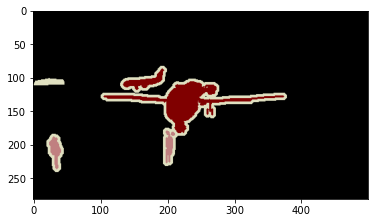

In [51]:
import cv2

cv2_img1 = cv2.imread(IMG_PATH) # BGR로 읽어옴, np.array
cv2_mask1 = cv2.imread(MASK_PATH)
cv2_img2 = cv2.cvtColor(cv2_img1, cv2.COLOR_BGR2RGB) # RGB로 변환
cv2_mask2 = cv2.cvtColor(cv2_mask1, cv2.COLOR_BGR2RGB)

print(type(cv2_img2))
print(cv2_img2.shape, cv2_mask2.shape)

print(f'cv2의 Type : {type(cv2_img2)}')
print()
print('<<cv2_img2>>')
print(f'Shape : {cv2_img2.shape}')
print(f'Dtype : {cv2_img2.dtype}')
print(f'요소갯수 : {len(set(cv2_img2.flatten()))}')
print('='*50)
print('<<cv2_mask2>>')
print(f'Shape : {cv2_mask2.shape}')
print(f'Dtype : {cv2_mask2.dtype}')
print(f'요소 : {set(cv2_mask2.flatten())}')


plt.imshow(cv2_mask2)
# plt.imshow(cv2_mask2, cmap='gray') # 이렇게 읽어도 컬러로 나옴

예상한대로 3차원 RGB의 이미지가 출력됨

## 2. PIL로 이미지 읽어오기

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(281, 500, 3) (281, 500)
Image.open의 Type : <class 'PIL.JpegImagePlugin.JpegImageFile'>

<<pil_img1>>
Shape : (281, 500, 3)
Dtype : uint8
요소갯수 : 256
<<pil_mask1>>
Shape : (281, 500)
Dtype : uint8
요소 : {0, 1, 15, 255}


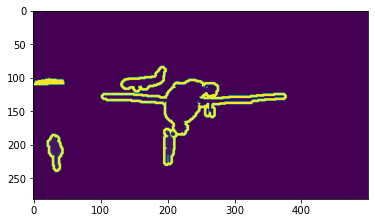

In [45]:
# import PIL로 해서 PIL.Image를 하면 모듈을 못 불러옴.
# PIL에서는 __init__.py에 자동으로 Image모듈을 불러오지 못하기 때문.
# 그래서 모듈을 콕 집어서 불러와야함.
from PIL import Image 

pil_img1 = Image.open(IMG_PATH) # <class 'PIL.JpegImagePlugin.JpegImageFile'>
pil_mask1 = Image.open(MASK_PATH)
np_pil_img1 = np.array(pil_img1) # jpegimage형태로는 학습할 수 없기 때문에 array로 변환해야함
np_pil_mask1 = np.array(pil_mask1)

print(f'Image.open의 Type : {type(pil_img1)}')
print()
print('<<pil_img1>>')
print(f'Shape : {np_pil_img1.shape}')
print(f'Dtype : {np_pil_img1.dtype}')
print(f'요소갯수 : {len(set(np_pil_img1.flatten()))}')
print('='*50)
print('<<pil_mask1>>')
print(f'Shape : {np_pil_mask1.shape}')
print(f'Dtype : {np_pil_mask1.dtype}')
print(f'요소 : {set(np_pil_mask1.flatten())}')

plt.imshow(np_pil_mask1)
# plt.imshow(np_pil_mask1, cmap='gray')

PIL로 불러와 array로 변환하면 2차원 형태가 되어 색이 없음. -> 학습하는데 문제가 됨

## 3. MATPLOTLIB으로 읽어오기

plt.imread의 Type : <class 'numpy.ndarray'>

<<plt_img1>>
Shape : (281, 500, 3)
Dtype : uint8
요소갯수 : 256
<<plt_mask1>>
Shape : (281, 500, 4)
Dtype : float32
요소 : {0.0, 1.0, 0.5019608, 0.8784314, 0.7529412}


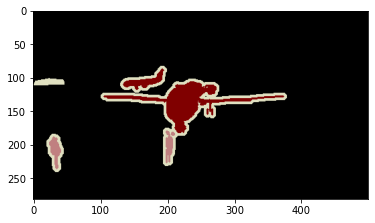

In [43]:
plt_img1 = plt.imread(IMG_PATH)
plt_mask1 = plt.imread(MASK_PATH)

print(f'plt.imread의 Type : {type(plt_img1)}')
print()
print('<<plt_img1>>')
print(f'Shape : {plt_img1.shape}')
print(f'Dtype : {plt_img1.dtype}')
print(f'요소갯수 : {len(set(plt_img1.flatten()))}')
print('='*50)
print('<<plt_mask1>>')
print(f'Shape : {plt_mask1.shape}')
print(f'Dtype : {plt_mask1.dtype}')
print(f'요소 : {set(plt_mask1.flatten())}')

plt.imshow(plt_mask1)

MATPLOTLIB는 MASK를 4채널로 불러옴.. 뭐지??

## 4. Tensorflow로 읽어오기

### 1) numpy로 변환

tf.keras.preprocessing.image.load_img의 Type : <class 'PIL.JpegImagePlugin.JpegImageFile'>

<<tf_img2>>
Type : <class 'numpy.ndarray'>
Shape : (281, 500, 3)
Dtype : uint8
요소갯수 : 256
<<tf_mask2>>
Type : <class 'numpy.ndarray'>
Shape : (281, 500, 3)
Dtype : uint8
요소 : {0, 224, 128, 192}


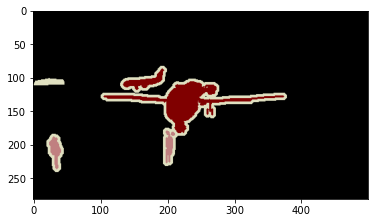

In [61]:
from tensorflow.keras.preprocessing import image

tf_img1 = image.load_img(IMG_PATH)
tf_mask1 = image.load_img(MASK_PATH)
tf_img2 = np.array(tf_img1)
tf_mask2 = np.array(tf_mask1)

print(f'tf.keras.preprocessing.image.load_img의 Type : {type(tf_img1)}')
print()
print('<<tf_img2>>')
print(f'Type : {type(tf_img2)}')
print(f'Shape : {tf_img2.shape}')
print(f'Dtype : {tf_img2.dtype}')
print(f'요소갯수 : {len(set(tf_img2.flatten()))}')
print('='*50)
print('<<tf_mask2>>')
print(f'Type : {type(tf_mask2)}')
print(f'Shape : {tf_mask2.shape}')
print(f'Dtype : {tf_mask2.dtype}')
print(f'요소 : {set(tf_mask2.flatten())}')
plt.imshow(tf_mask2)

### 2) tf.keras.preprocessing.img_to_array로 변환

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<<tf_img3>>
Type : <class 'numpy.ndarray'>
Shape : (281, 500, 3)
Dtype : float32
요소갯수 : 256
<<tf_mask3>>
Type : <class 'numpy.ndarray'>
Shape : (281, 500, 3)
Dtype : float32
요소 : {0.0, 224.0, 128.0, 192.0}


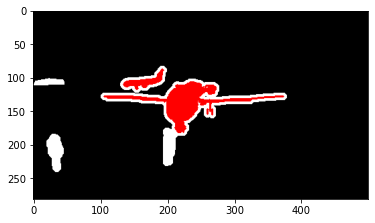

In [62]:
from tensorflow.keras.preprocessing import image

tf_img3 = image.img_to_array(tf_img1)
tf_mask3 = image.img_to_array(tf_mask1)

# tf_mask3
# print(f'tf.keras.preprocessing.image.load_img의 Type : {type(tf_img1)}')
# print()
print('<<tf_img3>>')
print(f'Type : {type(tf_img3)}')
print(f'Shape : {tf_img3.shape}')
print(f'Dtype : {tf_img3.dtype}')
print(f'요소갯수 : {len(set(tf_img3.flatten()))}')
print('='*50)
print('<<tf_mask3>>')
print(f'Type : {type(tf_mask3)}')
print(f'Shape : {tf_mask3.shape}')
print(f'Dtype : {tf_mask3.dtype}')
print(f'요소 : {set(tf_mask3.flatten())}')
plt.imshow(tf_mask3)